# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from datetime import datetime
from pathlib import Path

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?' + 'appid=' + weather_api_key + '&units=metric' + '&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | enewetak
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | dangriga
Processing Record 4 of Set 1 | vuokatti
Processing Record 5 of Set 1 | hovd
Processing Record 6 of Set 1 | astrakhan
Processing Record 7 of Set 1 | aykhal
Processing Record 8 of Set 1 | peace river
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | presidencia de la plaza
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | pucallpa
Processing Record 13 of Set 1 | panshan
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | mizan teferi
Processing Record 16 of Set 1 | anadyr
Processing Record 17 of Set 1 | igarka
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | bredasdorp
Processing Rec

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,27.45,78,71,8.54,MH,1703201221
1,jamestown,42.0970,-79.2353,0.29,88,0,3.60,US,1703201080
2,dangriga,16.9692,-88.2321,24.26,77,47,4.88,BZ,1703201221
3,vuokatti,64.1460,28.2697,-7.08,99,96,1.68,FI,1703201221
4,hovd,48.0056,91.6419,-19.53,80,35,1.17,MN,1703201213


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv(Path('output_data', 'cities.csv'), index_label="City_ID")

In [8]:
# Country code 'NA' exist so it should be removed from the na_values list
na_values = [
    ' ', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NULL', 'NaN', 'None', 'n/a', 'nan', 'null ']

# Read saved data
city_data_df = pd.read_csv(Path('output_data', 'cities.csv'), index_col = "City_ID", na_values = na_values, keep_default_na = False)

# Grab the date the data was pulled on for later use
data_date = datetime.utcfromtimestamp(city_data_df['Date'][0]).date()

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,27.45,78,71,8.54,MH,1703201221
1,jamestown,42.0970,-79.2353,0.29,88,0,3.60,US,1703201080
2,dangriga,16.9692,-88.2321,24.26,77,47,4.88,BZ,1703201221
3,vuokatti,64.1460,28.2697,-7.08,99,96,1.68,FI,1703201221
4,hovd,48.0056,91.6419,-19.53,80,35,1.17,MN,1703201213


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

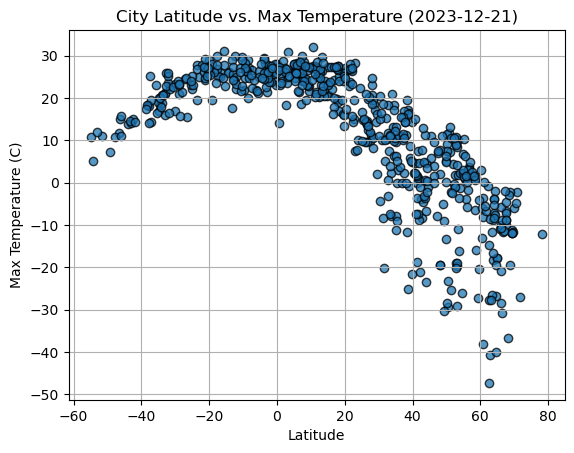

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({data_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()


# Save the figure
plt.savefig(Path('output_data', 'Fig1.png'))

# Show plot
plt.show()

#### Latitude Vs. Humidity

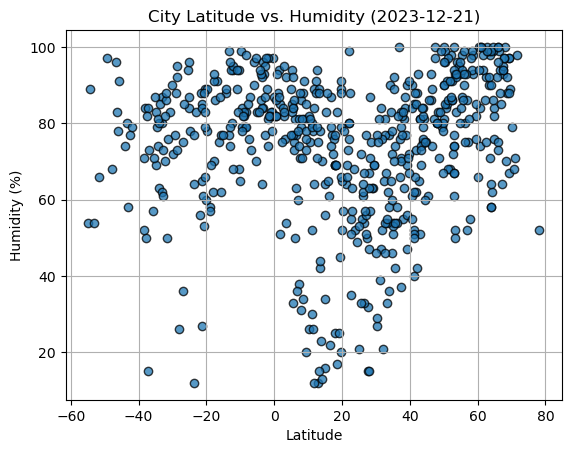

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({data_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig(Path('output_data', 'Fig2.png'))

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

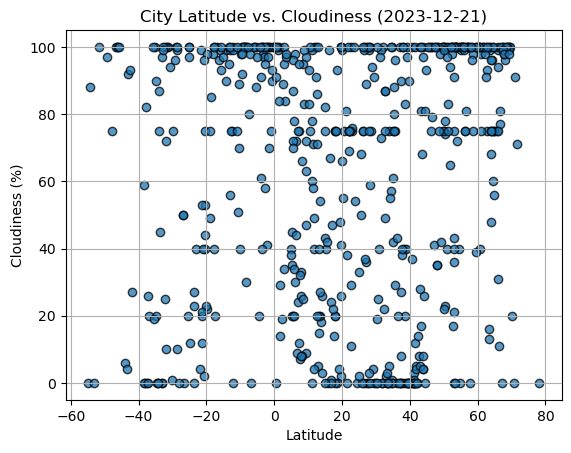

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({data_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig(Path('output_data', 'Fig3.png'))

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

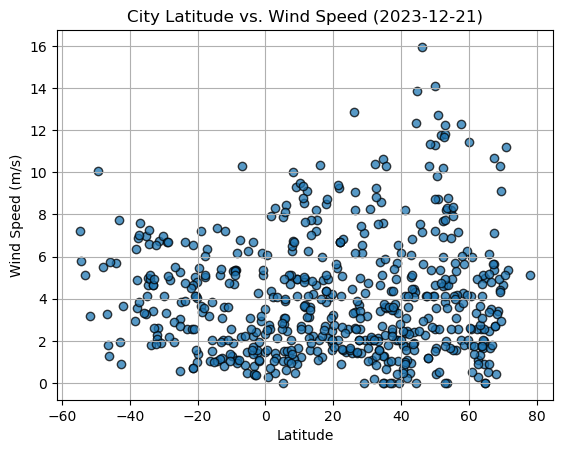

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({data_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x_data, y_data):
    lin_reg = linregress(x_data, y_data)
    line = lin_reg.slope * x_data + lin_reg.intercept
    equation = "y = " + str(round(lin_reg.slope, 2)) + "x + " + str(round(lin_reg.intercept, 2))
    
    # Find a reasonable position for the equation on the plot
    line_x_min = line[x_data.idxmin()]
    line_x_max = line[x_data.idxmax()]
    plot_area = [y_data.max() - line_x_min, line_x_min - y_data.min(), y_data.max() - line_x_max, line_x_max - y_data.min()]

    match plot_area.index(max(plot_area)):
        case 0: annotation_pos = (x_data.min(), y_data.max() - (y_data.max() - y_data.min()) / 20)
        case 1: annotation_pos = (x_data.min(), y_data.min())
        case 2: annotation_pos = (x_data.max() - (x_data.max() - x_data.min()) / 2.5, y_data.max() - (y_data.max() - y_data.min()) / 20)
        case 3: annotation_pos = (x_data.max() - (x_data.max() - x_data.min()) / 2.5, y_data.min())

    print(f'The r-value is: {lin_reg.rvalue**2}')

    plt.scatter(x_data, y_data)                                         # Plot the data
    plt.plot(x_data, line, 'r')                                         # Plot the linear relationship
    plt.annotate(equation, annotation_pos, fontsize = 15, color = 'r')  # Show the linear equation
    plt.xlabel('Latitude')
    plt.ylabel(y_data.name)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,27.45,78,71,8.54,MH,1703201221
1,jamestown,42.0970,-79.2353,0.29,88,0,3.60,US,1703201080
2,dangriga,16.9692,-88.2321,24.26,77,47,4.88,BZ,1703201221
3,vuokatti,64.1460,28.2697,-7.08,99,96,1.68,FI,1703201221
4,hovd,48.0056,91.6419,-19.53,80,35,1.17,MN,1703201213


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,adamstown,-25.0660,-130.1015,22.12,84,100,5.28,PN,1703201222
9,presidencia de la plaza,-27.0015,-59.8424,24.38,75,50,1.92,AR,1703201222
10,port lincoln,-34.7333,135.8667,16.85,69,90,4.66,AU,1703201222
11,pucallpa,-8.3791,-74.5539,27.02,83,100,6.17,PE,1703200933
13,ushuaia,-54.8000,-68.3000,10.81,54,0,7.20,AR,1703201222


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6817349954097848


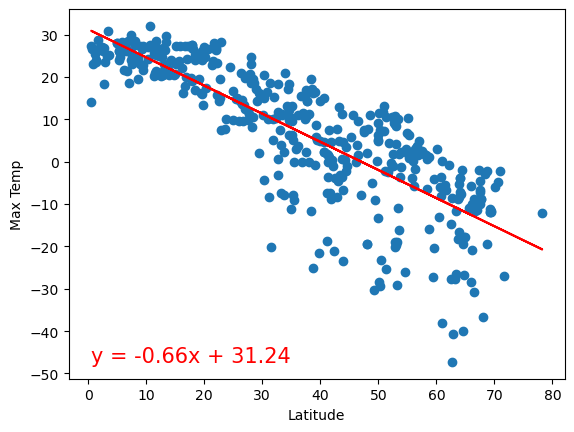

In [16]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r-value is: 0.5565522776009811


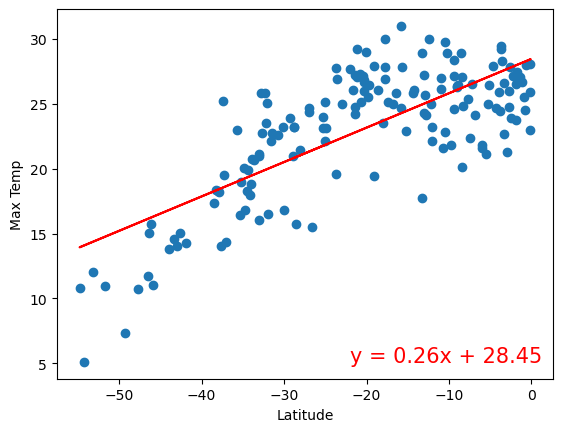

In [17]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** Both northern and southern hemisphere plots indicate a trend toward higher max temperatures as the latitude approaches the equator. The trend is stronger in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12794942122720587


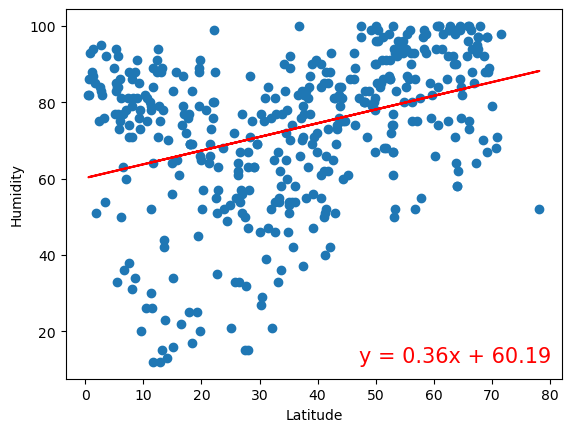

In [18]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r-value is: 0.09252295391865267


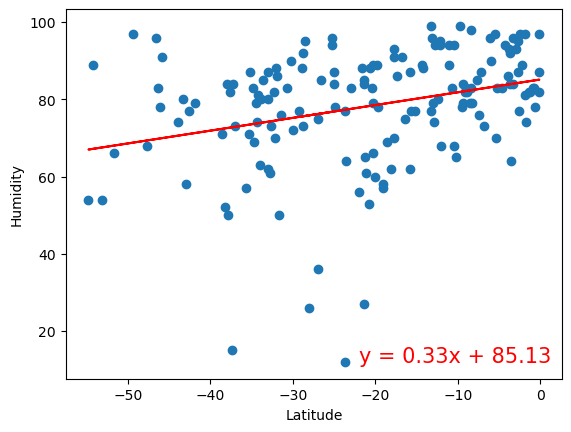

In [19]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** The linear relationship between latitude and humidity is weak for both northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05637422718244714


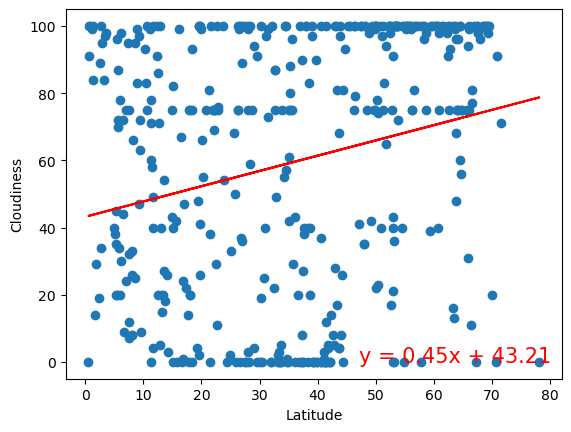

In [20]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r-value is: 0.11474236723658242


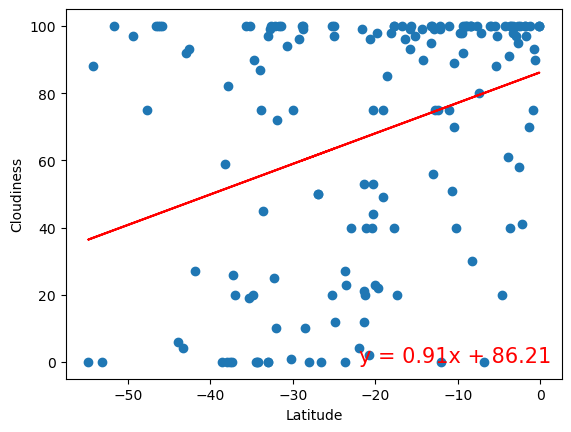

In [21]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** The linear relationship between latitude and cloudiness is very weak for the northern hemisphere and weak for the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0039584449389793415


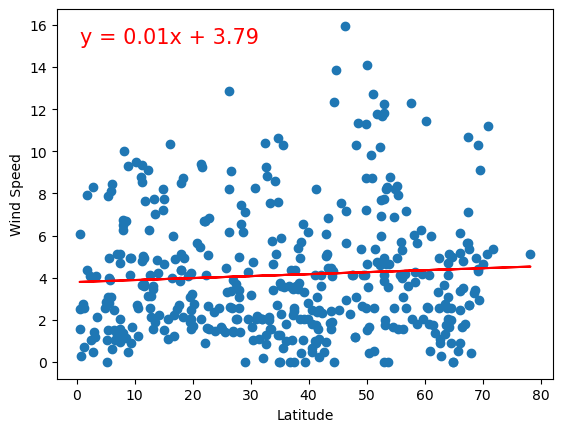

In [22]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r-value is: 0.10760473269615975


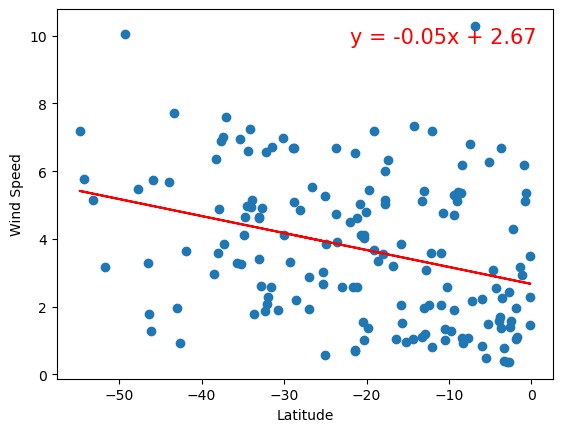

In [23]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** The linear relationship between latitude and wind speed is very weak, arguably noneexistant, for the northern hemisphere and weak for the southern hemisphere.